# **Приближённые решения алгебраических и трансцендентных уравнений**

## **Корни уравнения**

Корнем уравнения $f(x) = 0$ называется значение $x$, подстановка которого в уравнение превращает его в верное числовое равенство.
Например, если в уравнение $x^2 + 5x + 4 = 0$ подставить $x = -1$ , то получим $0 = 0$ (верно). Решить уравнение —
значит найти его корни.

1) трансцендентные уравнения, как правило, не решаются аналитически, за исключением специальных случаев («школьного» типа),
когда уравнение можно удачной подстановкой свести к алгебраическому, например, $e^2x - 6e^x + 9 = 0$;

2) даже для алгебраического уравнения степени выше четвертой не существует формулы, выражающей корни через коэффициенты уравнения при помощи конечного числа арифметических операций и извлечения корней. 



Таким образом, большое значение имеет задача приближенного,
численного отыскания корней уравнений:

а) определяют количество корней уравнения и изолируют (отделяют) каждый из них. Отрезком изоляции называется отрезок, на котором лежит только один корень уравнения;

б) вычисляют каждый корень с требуемой точностью.

Для отделения корней уравнения $f(x) = 0$ применяют графический и аналитический методы.
В первом из них строят график функции $y = f(x)$ и приближенно
находят точки его пересечения с осью $Ox$ .

### **Построение графика функции и отделение корней**

Давайте попробуем отделить корни графическим способом

$$ ln(x) + 2x^2 - 2 = 0 $$

$$sin(x) + x^2 - 1 = 0$$

$$2ln(x) + 0.01x^2 = 0$$

$$3sin(x) - x + 3 = 0$$


График функции $y = f(х)$ - это множество всех точек плоскости, координаты $х$, $у$ которых удовлетворяют соотношению $y = f(x)$. Соответственно, чтобы построить график такой функции, нужно отразить на координатной плоскости изменение координат в зависисмости друг от друга. Чем меньше шаг, тем точнее будет отражено поведение функции. В то же время, при меньшем шаге, для построения аналогичного промежутка с большим шагом, потребуется больше точек для вычисления, хранения и рендеринга (отображения).

In [ ]:
import numpy as np # импортируем библиотеку numpy для продвинутых математических вычислений
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для визуализации, построения графиков
%matplotlib inline


Область определения функции может быть неограничена слева и справа. Разумно стоить функцию, на каком-либо промежутке отражающем интересующие детали, например, корень.

Для задания этого промежутка c равномерно разнесёнными значениями удобно воспользоваться функцией **arange** библиотеки **numpy**. Ниже представлены примеры задания массива равномерно разнесенных значений:

In [ ]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
np.arange(7.)

array([0., 1., 2., 3., 4., 5., 6.])

In [ ]:
np.arange(15,22)

array([15, 16, 17, 18, 19, 20, 21])

In [ ]:
np.arange(10,30,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [ ]:
np.arange(0.1, 2.2, 0.3)

array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9, 2.2])

При необходимости проведите дополнительные эксперменты с функцией **arange**.

Используя функцию **len** для подсчёта количества элементов рассчитайте сколько будет точек в промежутке от **-3.5** до **7** с шагом **0.021**


---



Построим график функции: $$ y = \frac{10}{(x^2 - 2)} - 2 $$

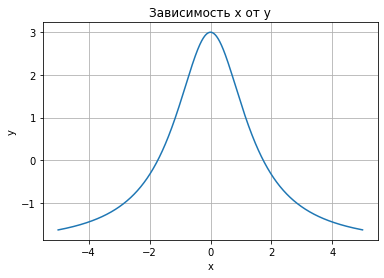

In [ ]:
x = np.arange(-5, 5, 0.01) # массив с равномерно разнесенными значениями внутри заданного интервала - дискретизация значений x

y = 10 / (x ** 2 + 2) - 2


plt.title('Зависимость x от y')
plt.xlabel('x') #ось абсцисс
plt.ylabel('y') #ось ординат
plt.grid() # включение отображения сетки
plt.plot(x,y) # построение графика

Исходя из графика можно веделить 2 корня уравнения, находящихся на промежутках:
**[-2; 1.5]** и **[1.5; 2]**. Данные отрезки содержат по одному корню (пересечение графика функции с осью абсцисс).

**Теперь можно вернуться к 4 уравнениям представленным в начале подраздела, построить их графики и отделить корни.**


---



## **Метод половинного деления (дихотомия)**

### **Описание метода**

Метод половинного деления один из методов решения нелинейных уравнений и основан на
последовательном сужении интервала, содержащего единственный корень уравнения $F(x)=0$ до
того времени, пока не будет достигнута заданная точность $ɛ$.
Пусть задан отрезок $[а,b]$, содержащий один корень уравнения. Предварительно необходимо
определить области локализации корней данного уравнения. Если на отрезке $[а,b]$ содержится более одного корня, то метод не работает.

### **Алгоритм метода**

1) Разобьем отрезок $[а,b]$ (содержащий оин корень) пополам. 

2) Определим новое приближение корня $х$ в середине отрезка $[а,b]$: $х=(а+b)/2$.

3) Найдем значения функции в точках $а$ и $х$: $F(a)$ и $F(x)$.

4) Проверим условие $F(a)F(x) < 0$. 

Если условие **выполнено**, то корень расположен на отрезке $[а,х]$. В этом случае необходимо точку $b$ переместить в точку $х$ **(b=х)**. 

Если условие **не выполнено**, то корень расположен на отрезке $[х,b]$. В этом случае необходимо точку $а$ переместить в точку $х$ **(а=х)**.

5) Перейти к делению отрезка пополам (к началу алгоритма). 

Алгоритм выполнять до тех пор, пока не будет выполнено условие: разность значений корней на текущем и предыдущем шаге станет меньше заданной погрешности $|F(x^i)-F(x^{i-1})| < ɛ$

### Задача: Найти корни уравнения **cos(x) + x - 2 = 0**
Точность вычислений: ***ɛ < 0.001***

---



## Метод итераций

### Описание метода

Исходное нелинейное уравнение записывается в виде: **x=f(x)**. 

Для решения рассчитываются вспомогательные параметры ***q*** и ***δ***, где ***δ***—уточнённая точность. 

Сначала находим отрезок **[a; b]** такой, что функция ***f(x)*** непрерывна и меняет знак на отрезке, то есть **f(a)f(b)<0**

Пусть известно начальное приближение корня ***х = х0*** .Подставляя это значение в правую часть уравнения, получим новое приближение: ***х1 = f(х0)***. Далее, подставляя каждый раз новое значение корня получимм последовательность значений: ***xi+1 = f(xi)***


### Алгоритм метода

1) Найдём параметр ***q = max(a≤x≤b) |f′(x)|*** ( для сходимости нужно обеспечить выполнение условия ***q < 1***), 

вычислим уточнённую точность ***δ=ε*(1−q)/q***, 

найдём приближение корня ***x0 =(a+b)/2***.

2) Найдём новое приближение корня ***x = f(x0)*** 

3) Если ***|x − x0| > δ***, то ***x0= x*** и идти к следующему шагу. Иначе, найден корень с требуемой точностью.

### Задача: Найти корни уравнения **cos(x) + x - 2 = 0**
Точность вычислений: ***ɛ < 0.001***

---



## Метод хорд

### Описание метода

Суть метода хорд состоит в разбиении отрезка **[a; b]** (при условии ***f(a)f(b) < 0***) на два отрезка с помощью хорды и выборе нового отрезка от точки пересечения хорды с осью абсцисс до неподвижной точки, на котором функция меняет знак и содержит решение, причём подвижная точка приближается к **ε**-окрестности решения.

### Алгоритм метода

Будем искать корень функции ***f(x)***. Выберем две начальные точки ***C1(x1;y1)*** и ***C2(x2;y2)*** и проведем через них прямую. Она пересечет ось абсцисс в точке ***(x3;0)***. Теперь найдем значение функции с абсциссой ***x3***. Временно будем считать ***x3*** корнем на отрезке **[x1;x2]**. Пусть точка ***C3*** имеет абсциссу ***x3*** и лежит на графике. Теперь вместо точек ***C1*** и ***C2*** мы возьмём точку ***C3*** и точку ***C2***. Теперь с этими двумя точками проделаем ту же операцию и так далее, то есть будем получать две точки ***Cn+1*** и ***Cn*** и повторять операцию с ними.

### Задача: Найти корни уравнения cos(x) + x - 2 = 0

Точность вычислений: ɛ < 0.001


---



### Задача: Найти корни уравнения y=x^3 + 3 = 0

Точность вычислений: ɛ < 0.0001

## Метод касательных

### Алгоритм

Задается начальное приближение ***x0***.

Пока не выполнено условие остановки (то есть погрешность в нужных пределах), вычисляют новое приближение:

***xn+1 = xn - f(xn)/f'(xn)***

В качестве условия сходимости можно взять
***|xn+1 - xn| < ɛ*** или ***f(xn+1)< ε***

### Задача: Найти корни уравнения y=x^3 + 3 = 0

Точность вычислений: ɛ < 0.0001


---



## **Индивидуальное задание**

Необходимо решить уравнение 2 из 4 рассмотренных методов:

(0) Метод половинного деления (метод дихотомии)

(1) Метод простой итерации

(2) Метод хорд

(3) Метод касательных (метод Ньютона)

__

Точность вычислений: **ɛ < 0.0001**

**Методы выбираются при подстановке номера варианта в ячейку ниже:**

In [ ]:
option = 1 # заменить число на свой номер варианта
first_method = option % 4
second_method = option % 2 + 1 
print(first_method, second_method)


1 2


**В случае если в методе простых итераций q > 1, выбрать другой метод по своему усмотрению.**

## **Уравнения:**
### **1) $ sin(x) - ln(x) = 0 $**

### **2) $ x + cos(x) = 0 $**

### **3) $ 2x + cos(3x) - 2 = 0 $**

### **4) $ ln(x) - cos(0.5x) = 0 $**

### **5) $ x^3 + cos(2x) - 5 = 0 $**

### **6) $ 2*exp(\frac{x}{2}) + cos(3x) - 7.5 = 0 $**

### **7) $ \frac{x^\frac{1}{3}}{4} - 0.5 = 0 $**

### **8) $ \pi - \frac{x^3}{4} - 24 = 0 $**

### **9) $ 2*exp(\frac{1}{3}x) - \pi = 0 $**

### **10) $ x^\frac{1}{2} - 7 = 0 $**

### **11) $ arctan(\frac{x}{9}) - 1 = 0 $**

### **12) $ sin(x^3) - ln(x) - 2 = 0 $**

### **13) $ cos(x^3) - ln(x) - 2 = 0 $**

### **14) $ x^5 - 10000 = 0 $**

### **15) $ x^3 - 200 = 0 $**

### **16) $ x^3 + 150 = 0 $**

### **17) $ x^3 + 70 - 3x = 0 $**

### **18) $ 2-ln(x) = 0 $**

### **19) $ \frac{\pi}{2} - ln(x) = 0 $**

### **20) $ \frac{x}{2} - \frac{ln(x)}{3} -13 = 0 $**

### **21) $ \frac{x}{7} + exp(x) - 7 = 0 $**

### **22) $ \frac{x}{6} + exp(x) - 10 = 0 $**

### **23) $ \frac{x}{5} - exp(x) + 120 = 0 $**

### **24) $ cos(x) - x + 10 = 0 $**

### **25) $ sin(x) + x - 20 = 0 $**